<a href="https://colab.research.google.com/github/akmal1994/Akmal-Jah-Quamri/blob/master/000_CIFAR_end_to_end_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
(X_train,y_train),(X_test,y_test)= tf.keras.datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train=X_train.astype('float64')/255
X_test=X_test.astype('float64')/255

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
(y_train, y_valid) = y_train[5000:], y_train[:5000]
(X_train, X_valid) = X_train[5000:], X_train[:5000]

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [9]:
model=Sequential()

In [10]:
model.add(Conv2D(filters=16,kernel_size=3, strides=(2), padding='same', activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(2))

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(units=56,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=112,kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=112,kernel_initializer='uniform',activation='relu'))

In [13]:
model.add(Dense(units=10,kernel_initializer='uniform',activation='softmax'))

### sparse_categorical_crossentropy as we don't have one hot encoded y labels

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=(['accuracy']))


In [15]:
history=model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=50,batch_size=100,verbose=2)

Epoch 1/50
450/450 - 3s - loss: 1.9904 - accuracy: 0.2132 - val_loss: 1.7951 - val_accuracy: 0.2882
Epoch 2/50
450/450 - 1s - loss: 1.7439 - accuracy: 0.3157 - val_loss: 1.6635 - val_accuracy: 0.3552
Epoch 3/50
450/450 - 1s - loss: 1.6387 - accuracy: 0.3678 - val_loss: 1.5879 - val_accuracy: 0.3848
Epoch 4/50
450/450 - 1s - loss: 1.5443 - accuracy: 0.4091 - val_loss: 1.4992 - val_accuracy: 0.4322
Epoch 5/50
450/450 - 1s - loss: 1.4607 - accuracy: 0.4499 - val_loss: 1.4575 - val_accuracy: 0.4546
Epoch 6/50
450/450 - 1s - loss: 1.4050 - accuracy: 0.4724 - val_loss: 1.4056 - val_accuracy: 0.4774
Epoch 7/50
450/450 - 1s - loss: 1.3664 - accuracy: 0.4912 - val_loss: 1.3533 - val_accuracy: 0.4998
Epoch 8/50
450/450 - 1s - loss: 1.3269 - accuracy: 0.5096 - val_loss: 1.3588 - val_accuracy: 0.4958
Epoch 9/50
450/450 - 1s - loss: 1.2936 - accuracy: 0.5225 - val_loss: 1.2912 - val_accuracy: 0.5254
Epoch 10/50
450/450 - 1s - loss: 1.2666 - accuracy: 0.5328 - val_loss: 1.3134 - val_accuracy: 0.5124

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
df =pd.DataFrame(history.history)
df.head(2)

,loss,accuracy,val_loss,val_accuracy
0,1.990417,0.213222,1.795057,0.2882
1,1.743918,0.315667,1.663523,0.3552


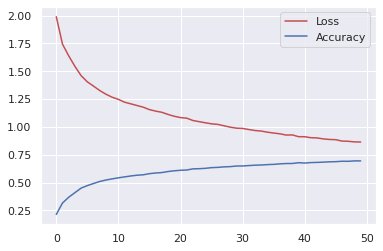

In [18]:
plt.plot(df.loss,label='Loss',c='r')
plt.plot(df.accuracy,label='Accuracy',c='b')
plt.legend();

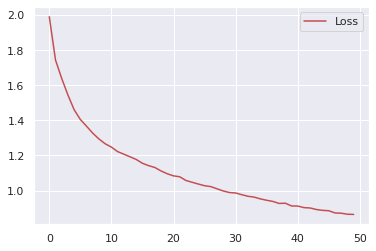

In [19]:
plt.plot(df.loss,label='Loss',c='r')
plt.legend();

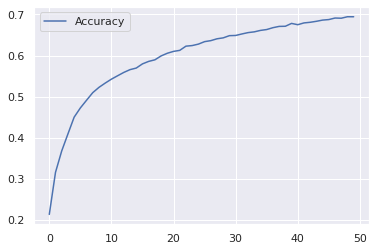

In [20]:
plt.plot(df.accuracy,label='Accuracy',c='b')
plt.legend();

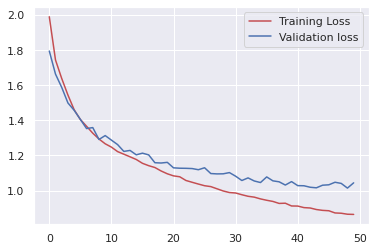

In [21]:
plt.plot(df.loss,label='Training Loss',c='r')
plt.plot(df.val_loss,label='Validation loss',c='b')
plt.legend();

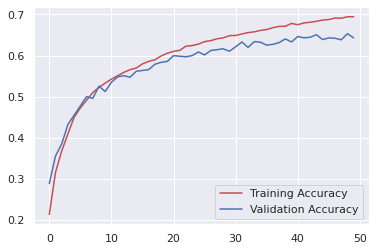

In [22]:
plt.plot(df.accuracy,label='Training Accuracy',c='r')
plt.plot(df.val_accuracy,label='Validation Accuracy',c='b')
plt.legend();

In [23]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0603 - accuracy: 0.6358


[1.0603195428848267, 0.6358000040054321]

In [24]:
loss_test, accuracy_test = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0603 - accuracy: 0.6358


In [25]:
print(loss_test)
print(accuracy_test)

1.0603195428848267
0.6358000040054321


In [38]:
print(y_test[123])

[2]


In [33]:
X_test.shape

(10000, 32, 32, 3)

In [39]:
X_test[123].shape

(32, 32, 3)

In [40]:
model.predict(X_test[123][np.newaxis,...])

array([[0.00292534, 0.00067426, 0.54032284, 0.05911292, 0.01340835,
        0.28926635, 0.01349625, 0.07858684, 0.00086277, 0.00134411]],
      dtype=float32)

In [41]:
y_pred= model.predict(X_test[123][np.newaxis,...])

In [42]:
np.argmax(y_pred)

2